## Data Acquisition

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import neighbors, preprocessing
from sklearn import metrics

from classification_viz import plot_decisions_2d

In [ ]:
iris = datasets.load_iris()
raw_data = iris.data
target = iris.target

## Initial Data Analysis

In [ ]:
print(f'Dataset type: {type(raw_data)}')
print(f'Target type: {type(target)}')
print(f'Dataset shape: {raw_data.shape}')
print(f'Target shape: {target.shape}')

Dataset type: <class 'numpy.ndarray'>
Target type: <class 'numpy.ndarray'>
Dataset shape: (150, 4)
Target shape: (150,)


## Setup Experiment

### Preprocessing Data
We restrict the dataset to two features. This is only because in this lecture, we want to use 2-dimensional, thus paintable, examples. Usually, we would never drop columns just like that.

In [ ]:
data=raw_data[:,[2,3]]

## Split data 2 ways
Create training, test, and validation data

In [ ]:
# like in the exercise
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.4, shuffle=True, random_state=1, stratify=target)
# different random split
#X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.4, shuffle=True, random_state=42, stratify=target)
# split without randomization
#X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.4, shuffle=False)

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(90, 2) (90,) (60, 2) (60,)


In [ ]:
print(np.bincount(target))
print(np.bincount(y_train))
print(np.bincount(y_test))

[50 50 50]
[30 30 30]
[20 20 20]


## Training (Machine Learning)

In [ ]:
clf = neighbors.KNeighborsClassifier(1, weights='uniform', metric="euclidean")
scaler=preprocessing.MinMaxScaler(feature_range=(0,1))
X_train_sc=scaler.fit_transform(X_train)
clf.fit(X_train_sc, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [ ]:
X_train[0:5, :], X_train_sc[0:5,:]

(array([[5.6, 2.4],
        [6. , 2.5],
        [6.6, 2.1],
        [5.7, 2.1],
        [5.6, 1.4]]),
 array([[0.77966102, 0.95833333],
        [0.84745763, 1.        ],
        [0.94915254, 0.83333333],
        [0.79661017, 0.83333333],
        [0.77966102, 0.54166667]]))

## Evaluation
* Classify data instances, that the classifier did __not__ see during the training phase
* Check how many are classified correctly

In [ ]:
y_test_pred = clf.predict(scaler.transform(X_test))

In [ ]:
round(metrics.accuracy_score(y_test, y_test_pred),3)

1.0

### Comparison to Random Baseline: 
* 3 classes -> random guessing yiels $0.333$


run loop on different gamma values
take acc and time it took to learn
take score on training data, take score on test data

Until now we have just arbitrarily chosen $k$

### Scaling vs Raw data

In [ ]:
accuracies=[]
accuracies_sc=[]
ks=range(1,11)
scaler=preprocessing.MinMaxScaler(feature_range=(0,1))
X_train_sc=scaler.fit_transform(X_train)

for k in ks:    
    clf = neighbors.KNeighborsClassifier(k, weights='uniform', metric="euclidean")
    clf.fit(X_train_sc, y_train)
    y_test_pred = clf.predict(scaler.transform(X_test))
    accuracies_sc.append(metrics.accuracy_score(y_test, y_test_pred))
    
    clf = neighbors.KNeighborsClassifier(k, weights='uniform', metric="euclidean")
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    accuracies.append(metrics.accuracy_score(y_test, y_test_pred))

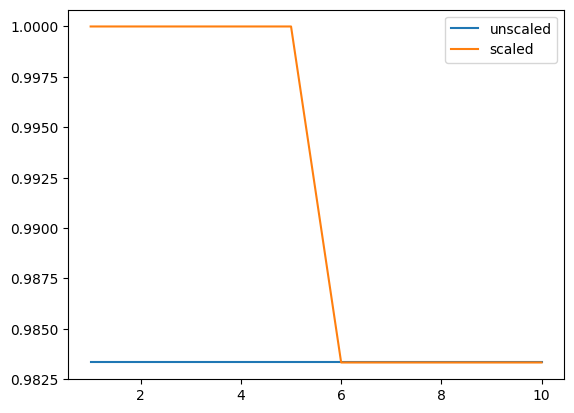

In [ ]:
plt.plot(ks, accuracies, label="unscaled")
plt.plot(ks, accuracies_sc, label="scaled")
plt.legend()

Scaling seems to have an effect

## Comparing Hyperparameters

In [ ]:
def get_acc(k, voting, metric):
    clf = neighbors.KNeighborsClassifier(k, weights=voting, metric=metric)
    clf.fit(X_train_sc, y_train)
    y_test_pred = clf.predict(X_test_sc)
    acc=metrics.accuracy_score(y_test, y_test_pred)
    return acc


uniform_euclidean_acc=[]
distance_euclidean_acc=[]
uniform_manhattan_acc=[]
distance_manhattan_acc=[]

ks=range(1,11)

scaler=preprocessing.MinMaxScaler(feature_range=(0,1))
X_train_sc=scaler.fit_transform(X_train)
X_test_sc=scaler.transform(X_test)

for k in ks:
    uniform_euclidean_acc.append(get_acc(k, 'uniform', 'euclidean'))
    distance_euclidean_acc.append(get_acc(k, 'distance', 'euclidean'))
    uniform_manhattan_acc.append(get_acc(k, 'uniform', 'manhattan'))
    distance_manhattan_acc.append(get_acc(k, 'distance', 'manhattan'))


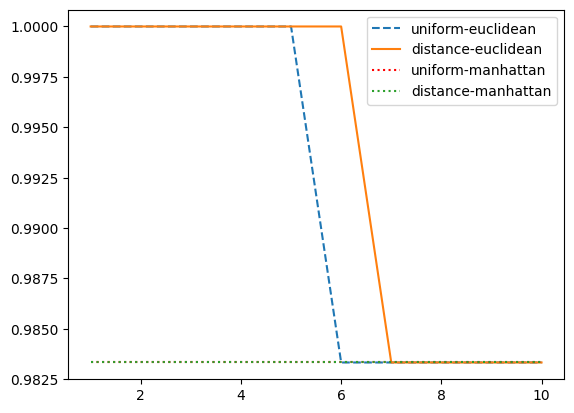

In [ ]:
plt.plot(ks, uniform_euclidean_acc, linestyle='dashed', label='uniform-euclidean')
plt.plot(ks, distance_euclidean_acc, label='distance-euclidean')
plt.plot(ks, uniform_manhattan_acc, linestyle='dotted', c='red', label='uniform-manhattan')
plt.plot(ks, distance_manhattan_acc, linestyle='dotted', label='distance-manhattan')
plt.legend()

Choosing different distances does not change much, curves for manhatten cover the curves for euclidean distance
$k=1$ seems to be the best choice, together with uniform voting.

### Draw decision boundaries

In [ ]:
clf = neighbors.KNeighborsClassifier(1, weights='uniform', metric="euclidean")
clf.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

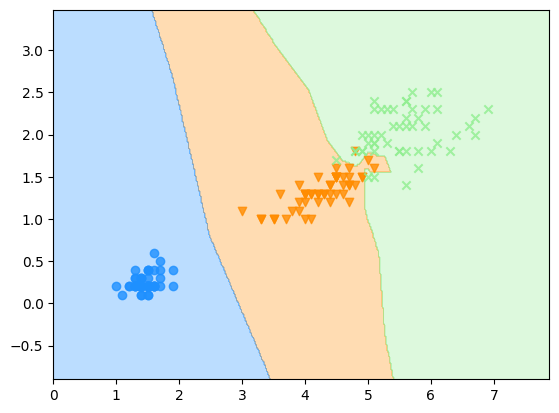

In [ ]:
plot_decisions_2d(data, target, clf)

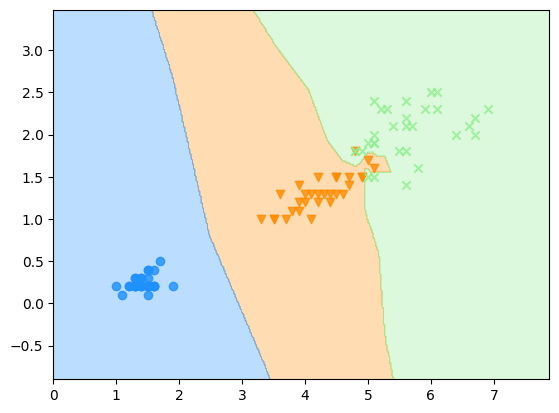

In [ ]:
plot_decisions_2d(X_train, y_train, clf)

## Bonus: 
Let's try our best combination with different seeds.

In [ ]:
accs=[]
seeds=range(100)
for seed in seeds:
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.4, shuffle=True, random_state=seed, stratify=target)
    scaler=preprocessing.MinMaxScaler(feature_range=(0,1))
    X_train_sc=scaler.fit_transform(X_train)
    X_test_sc=scaler.transform(X_test)
    clf = neighbors.KNeighborsClassifier(1, weights='uniform', metric="euclidean")
    clf.fit(X_train_sc, y_train)
    y_test_pred = clf.predict(X_test_sc)
    acc=metrics.accuracy_score(y_test, y_test_pred)
    accs.append(acc)

In [ ]:
np.mean(accs)

0.9566666666666667

In [ ]:
np.std(accs)

0.023452078799117145

We see, that our observation before was overly optimistic.
1. We tried only one train/test-split. Apparently we create a particulary easy split, reaching acc=1
2. We used the same data for optimizing the hyperparameter $k$ as for assessing the overall performance.

Conclusion: Always try more than one split, split into even more than just two parts (Validation Data, Cross Validation, later in this module)